<a href="https://colab.research.google.com/github/tucker-anderson/Facial-Keynotes/blob/master/Facial_Keypoints_Notebook_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 Final Project: Facial Keypoints Detection

Section 6; Summer 2019

**Team Members:**
- Tucker Anderson
- Bruno Todescan
- Madia Taher

In [28]:
# First setup environment
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import csv

from tensorflow import keras as keras
# import tensorflow as tf

# import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Colab setup:
# from google.colab import drive
# drive.mount('/content/drive')

# Define constants:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

# Exploratory Data Analysis
Let's take a quick look at the data to understand a little about formatting, ranges, relationships, etc. 

In [3]:
lookid_data = pd.read_csv("IdLookupTable.csv")
lookid_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [4]:
# Take a quick look at the submission data
samplesubmission = pd.read_csv("SampleSubmission.csv")
samplesubmission.head()

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
test_data_df = pd.read_csv("test.csv")
test_data_df.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [6]:
# Take a quick look at the training data:
train_data = pd.read_csv("training.csv")
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [7]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
len(train_data)

7049

In [9]:
print(train_data.count())# prints the number of values for each column
print(len(train_data))
df = train_data.dropna()  # drop all rows that have missing values in them
len(df)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

2140

There are clearly lots of missing values in the example data set. This is ok though, since we don't need (or even want) a "perfect" data set for our model, since this can cause over fitting. Additionally, if we would to restrict our training data set to only the images with all valid number results, we would end up reducing our training set by almost 2/3, which could also lead to poor generalization.

## Training Data

Let's take a deeper look at our training data, since this is what we will be mostly focused on.

In [10]:
# Check for duplicates
# Remove Image column
td_remove_image=train_data.drop(['Image'], axis=1)
td_remove_image.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [11]:
duplicate_imgs = td_remove_image[td_remove_image.duplicated()]
len(duplicate_imgs)

0

So we don't have any *exact* duplicates in the data set, which although good to know, would not have affected our results tremendously.

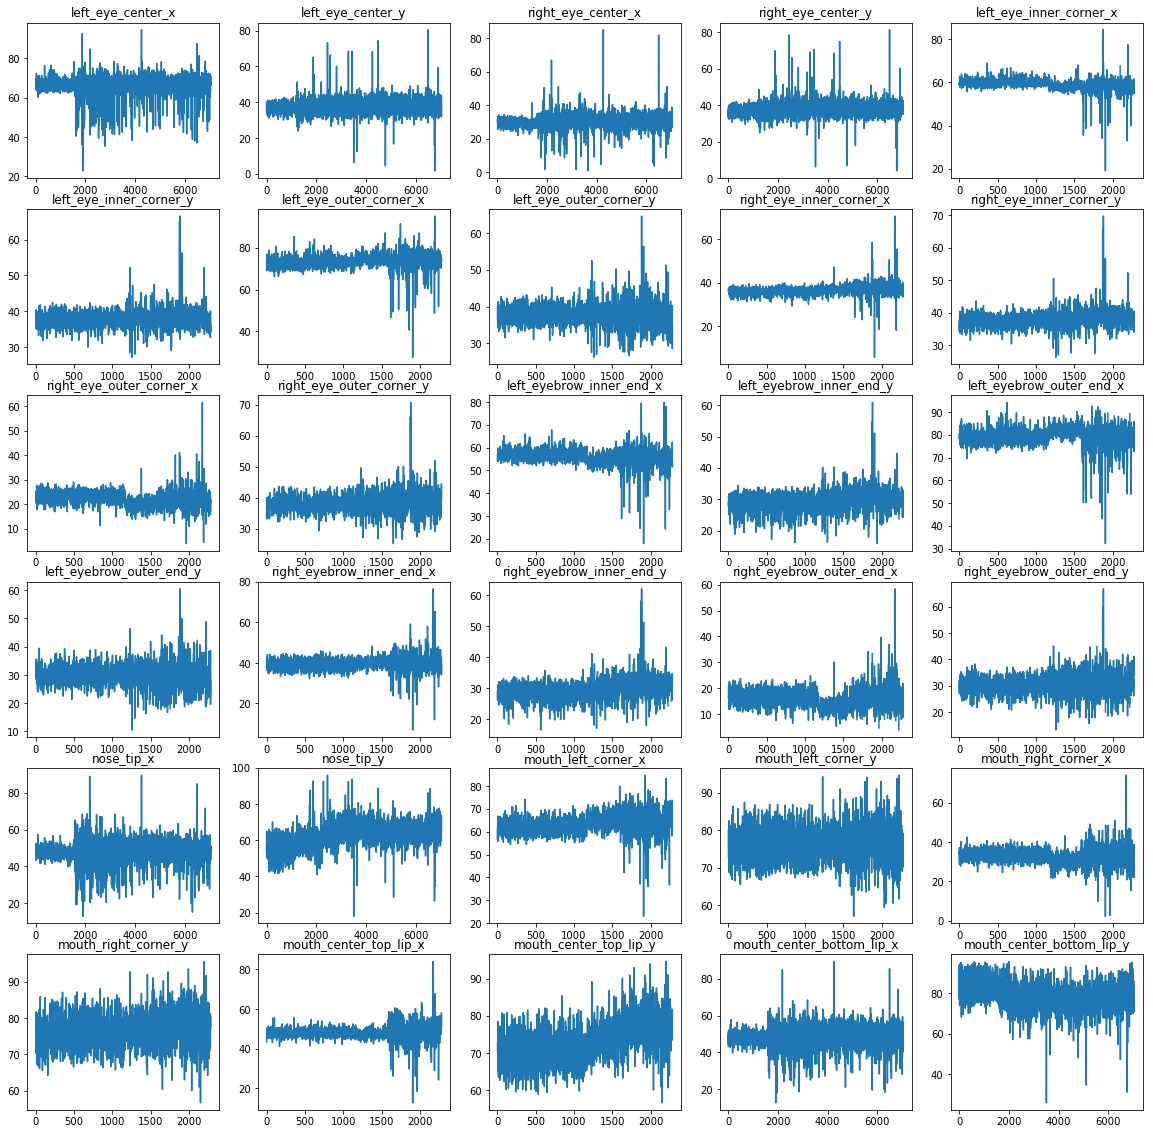

In [12]:
# Let's take a look at what the values look like. We use a line plot here and use histograms to below.
column_list=list(train_data.columns.values)
fig, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=5)

i=0
for row in ax:
    for col in row:
        col.plot(train_data[column_list[i]])
        col.set_title(column_list[i])
        i=i+1

plt.show()

a = train_data.iloc[:,0].copy()

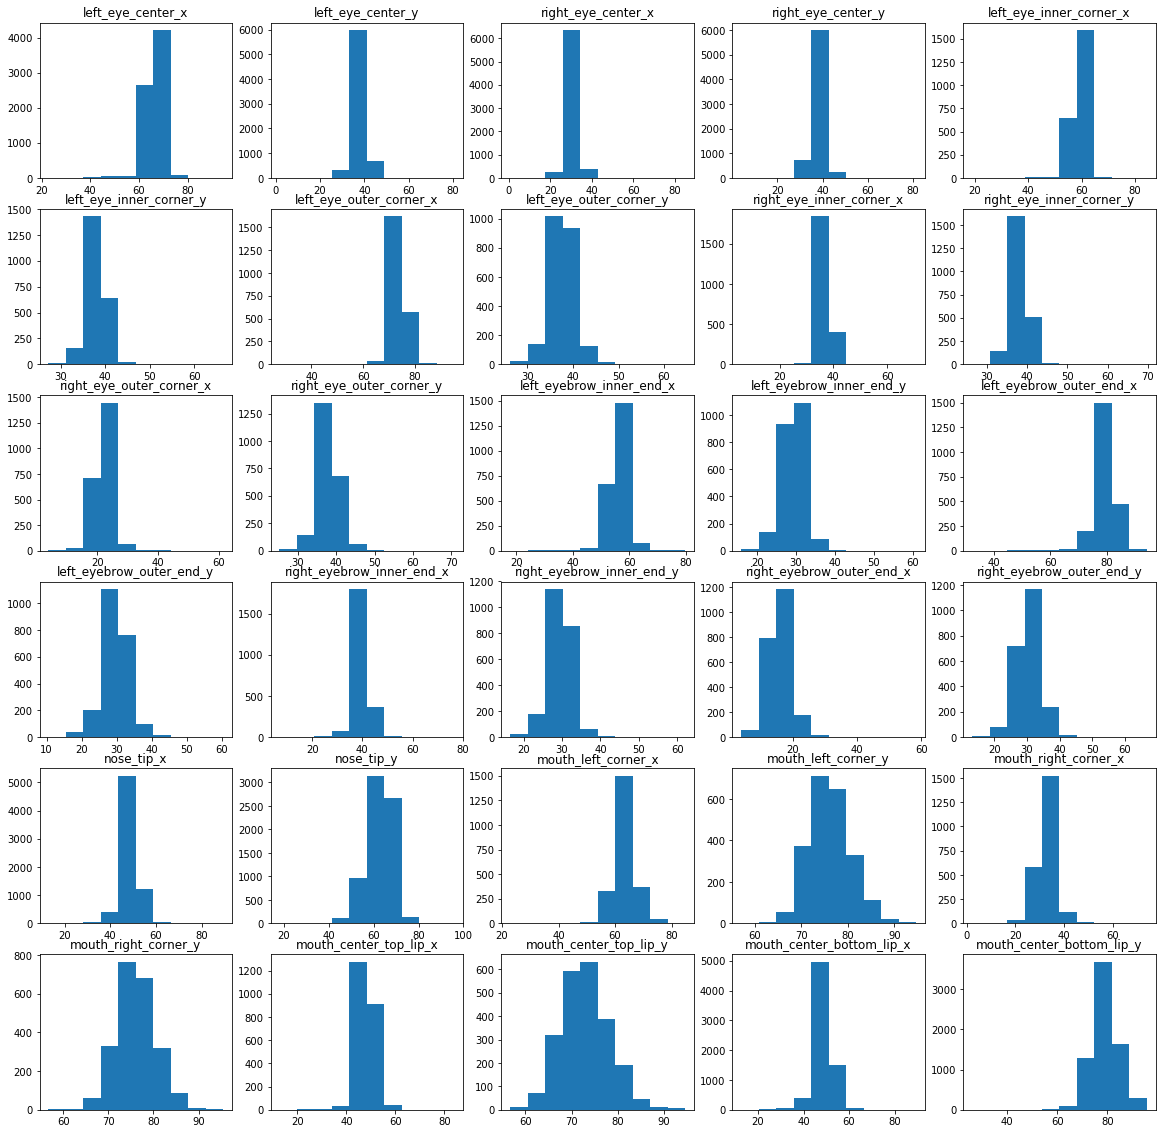

In [13]:
# What do the distributions look like (in 1-D)?
column_list=list(train_data.columns.values)
fig, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=5)

i=0
for row in ax:
    for col in row:
        col.hist(train_data[column_list[i]].dropna())
        col.set_title(column_list[i])
        i=i+1

plt.show()

So from the above two cell results (line plots and histograms) we can see that the values are generally pretty tightly grouped around the same values.

## 2-D EDA

This only tells us half the story - since we are looking at coordinates in two dimensions, we take a look at what the feature vlaue ranges look like together, as X and Y pairs.

Before we can do this, we create some helper funcitons to split our trianing data set into the 'train' and 'test' components (image data and results data) and show the images when passed image data.

### Helper Functions

In [14]:
# this function will take a data frame as an input and spit out two numpy arrays as a result:
# one ('labels') for the labels only (columns 0 to 29) for each of the features we are predicting, and
# another ('data') for the image pixel data corresponding to a 9216-long array of integer values between 0 and 255.
def trainDataLabelSplit(df):
    # assuming a dataframe input
    
    # create a DF of just the labels
    labels = np.array(df.iloc[:,:30])
    length = len(df)
#     length = 2

    data = np.empty(shape=(length,96,96,1))
    
    start = time.time()
    for i in range(length):
        data[i] = np.array(df.iloc[i,30].split()).reshape(96,96,1)
        if i % 500 == 0:
            print('%d: %.5f seconds elapsed.'%(i,time.time()-start))
    
    return labels, data.astype('int16')

In [15]:
start = time.time()
Ytrain, Xtrain = trainDataLabelSplit(train_data)
end = time.time()
print('Total %9.5f seconds.' %(end-start))

0: 0.01024 seconds elapsed.
500: 2.49533 seconds elapsed.
1000: 4.95166 seconds elapsed.
1500: 7.43201 seconds elapsed.
2000: 9.94152 seconds elapsed.
2500: 12.41794 seconds elapsed.
3000: 15.66562 seconds elapsed.
3500: 18.68975 seconds elapsed.
4000: 21.35919 seconds elapsed.
4500: 24.04014 seconds elapsed.
5000: 26.51586 seconds elapsed.
5500: 29.20414 seconds elapsed.
6000: 31.65806 seconds elapsed.
6500: 34.10821 seconds elapsed.
7000: 36.55011 seconds elapsed.
Total  36.97688 seconds.


In [16]:
# Take a dataframe as input expecting it to have been read from the test.csv input file.
# Reshape this data and return it as an numpy array.
def load_test_set(df):
    length = len(df)

    data = np.empty(shape=(length,96,96,1))
    
    start = time.time()
    for i in range(length):
        data[i] = np.array(df.iloc[i,1].split()).reshape(96,96,1)
        if i % 500 == 0:
            print('%d: %.5f seconds elapsed.'%(i,time.time()-start))
    
    return data.astype('int16')

In [17]:
start = time.time()
test_data = load_test_set(test_data_df)
end = time.time()
print('Total %9.5f seconds.' %(end-start))

0: 0.01156 seconds elapsed.
500: 2.47404 seconds elapsed.
1000: 4.91755 seconds elapsed.
1500: 7.39294 seconds elapsed.
Total   8.84164 seconds.


In [18]:
# This function takes as an input the image data and an array of labels in the 
# form of [x0, y0, x1, y1, ...] coordinates and overlays the label points on the image.
def show_image_labels(img, labels):
    for i in range(0, len(labels), 2):
        if ~np.isnan(labels[i+1]) and ~np.isnan(labels[i]):
            img[int(labels[i+1]),int(labels[i]),:] = 255
    plt.imshow(img[:,:,0], cmap='viridis')

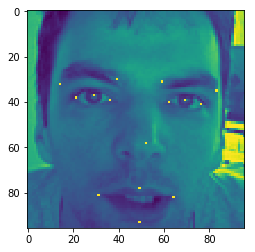

In [19]:
n = 5
show_image_labels(Xtrain[n], Ytrain[n])

Now we're ready to take a closer look at some of the data.

**Potentially interesting to look at:**
* distribution of the pixel values in 2D (where do we see concentrations?)
* distribution of the feature values in 2D

### Pixel Value Distributions
To get an idea about our data set, we can see what the densities are like for the image set. This can be accomplished by summing all the pixel values and plotting these. The imshow() command will automatically scale these representing a density plot.

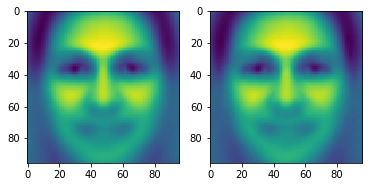

In [20]:
# To look at image densities, we "overlay" them by summing all the values at each pixel. 
# Higher values will show higher densities overall.

pixel_sums_train = np.zeros((96,96))
pixel_sums_test = np.zeros((96,96))

for r in range(96):
    for c in range(96):
        pixel_sums_train[r,c] = np.sum(Xtrain[:,r,c,0]/255)
        pixel_sums_test[r,c] = np.sum(test_data[:,r,c,0]/255)

plt.subplot(1,2,1)
plt.imshow(pixel_sums_train, cmap='viridis')
plt.subplot(1,2,2)
plt.imshow(pixel_sums_test, cmap='viridis')

This plot shows a few interesting points. The forehead, eyes, nose and cheeks are quite distinct, meaning that the majority of our images are centered in approximately the same location. The blurring above the lips and around the mouth area is likely due to mustaches, smiles vs frowns, etc. We can also see that our training and test sets generated similar images, so we should expect our model to perform relatively well to the test data set, though generalizability is something we'll need to look out for.

Based on this, one could assume that the a model may be more accurate with predictions of where the eyes and nose are, while having poorer accuracy with the mouth and potentially the ends of the eyebrows.

### Facial Keypoints Distributions

To take a deeper look at our dataset, we investigate where we our keypoints generally lie. This will help to identify any outlier images, and reinfornce the observations made in the previous step with the heatmaps.

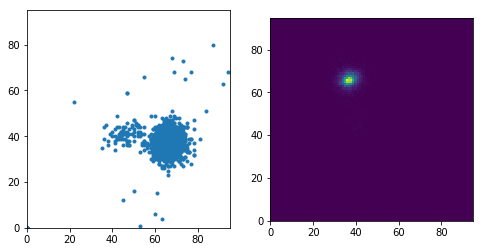

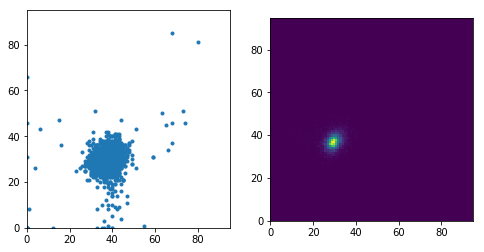

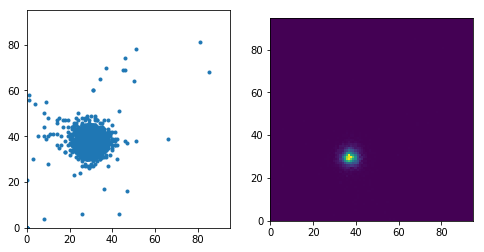

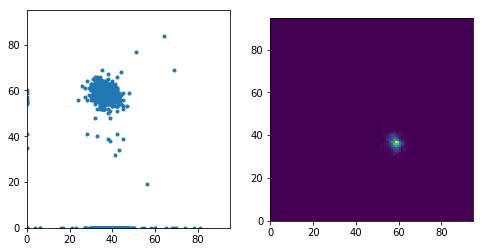

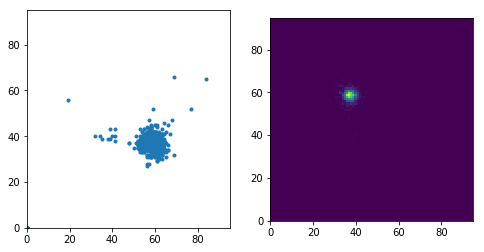

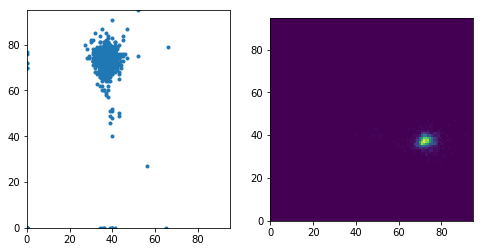

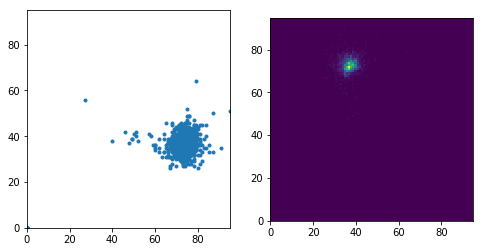

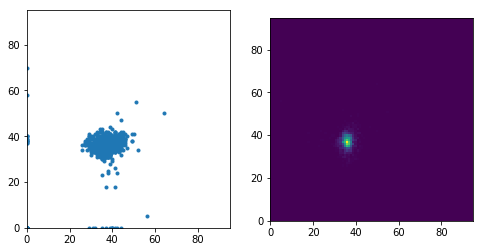

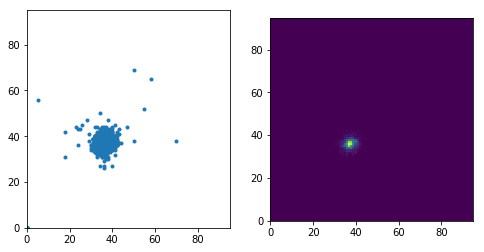

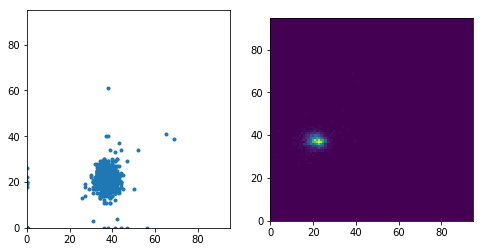

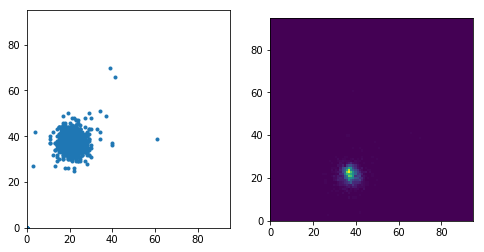

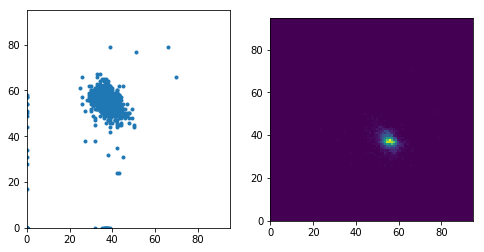

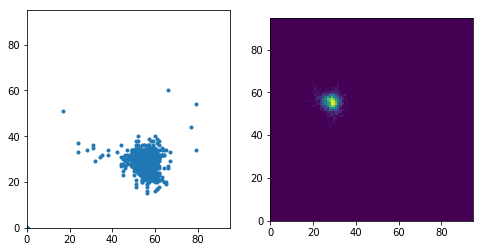

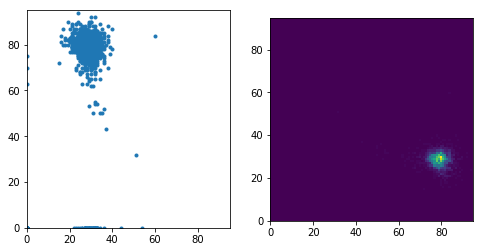

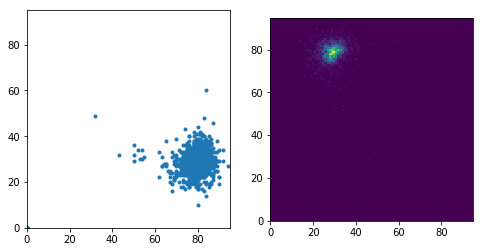

In [21]:
IMG_H = IMG_W = 96

def get_feature_density(feature_ind, label_array):
    feature_density = np.zeros((IMG_H, IMG_W))
    for i in range(len(label_array)):
        r = Ytrain[i,feature_ind]
        c = Ytrain[i,feature_ind+1]
        if ~np.isnan(r) and ~np.isnan(c):
            feature_density[int(r),int(c)] += 1
    return feature_density


for i in range(15):
    plt.figure(figsize=(8,4))
    ax1 = plt.subplot(1,2,1)
    ax1.scatter(x=Ytrain[:,i].astype('int8'), y=Ytrain[:,i+1].astype('int8'), marker='.')
    ax1.set_xlim(0,IMG_W-1)
    ax1.set_ylim(0,IMG_H-1)

    ax2 = plt.subplot(1,2,2)
    ax2.imshow(get_feature_density(i,Ytrain), cmap='viridis')
    ax2.set_xlim(0,IMG_W-1)
    ax2.set_ylim(0,IMG_H-1)

    plt.show()

We can see that the features are generally clustered around a point, with few outliers. This aligns with the findings above where we saw the "average" image for our data set.

# Training a Baseline Neural Net Model

In [5]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D

m = Sequential()
m.add(Flatten(input_shape = Xtrain[1].shape))

m.add(Dense(128, activation = 'relu'))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(30))

m.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

NameError: name 'Xtrain' is not defined

In [6]:
m.fit(Xtrain, Ytrain, epochs = 10, batch_size=100)

NameError: name 'Xtrain' is not defined

# Using Transfer Learninng and a Pretrained model on our data set 

First we investigate using the VGG16 model (trained on ImageNet) from the Keras library. The original paper for this model can be found here: https://arxiv.org/pdf/1409.1556.pdf

In [2]:
# import the needed libraries
from keras.applications.vgg16 import VGG16

# Create the model
vgg_model = VGG16(weights='imagenet', include_top=False)

# Try to "get_layers" of the model to see which layers we can pull weights from.
# --> Likely will want the last conv layer for our own training, but we need to know the name.
# Documentation on how to get weights from a layer here: 
# https://keras.io/applications/#usage-examples-for-image-classification-models



Using TensorFlow backend.


In [3]:
vgg_model.layers

In [4]:
a = vgg_model.get_layer(index = 2)
a.get_weights()

[array([[[[ 1.66219279e-01,  1.42701820e-01, -4.02113283e-03, ...,
            6.18828237e-02, -1.74057148e-02, -3.00644431e-02],
          [ 9.46945231e-03,  3.87477316e-03,  5.08365929e-02, ...,
           -2.77981739e-02,  1.71373668e-03,  6.82722731e-03],
          [ 6.32681847e-02,  2.12877709e-02, -1.63465310e-02, ...,
            8.80054955e-04,  6.68104272e-03, -1.41139806e-03],
          ...,
          [ 3.47490981e-03,  8.47019628e-02, -4.07223180e-02, ...,
           -1.13523193e-02, -7.48998486e-03,  3.19077494e-03],
          [ 5.97234145e-02,  4.97663505e-02, -3.23118735e-03, ...,
            1.43114366e-02,  3.03175431e-02, -4.23925705e-02],
          [ 1.33459672e-01,  4.95484173e-02, -1.78808011e-02, ...,
            2.25385167e-02,  3.02020740e-02, -2.17075031e-02]],
 
         [[ 2.12007999e-01,  2.10127644e-02, -1.47626130e-02, ...,
            2.29580477e-02,  1.23102348e-02, -3.08422819e-02],
          [-2.62175221e-03,  7.42094172e-03,  6.74030930e-02, ...,
     

In [50]:
b = np.array(a.get_weights())

In [51]:
b.shape

(2,)

In [52]:
b[0].shape

(3, 3, 64, 64)

In [53]:
b[1].shape

(64,)

In [55]:
Xtrain[1].shape

(96, 96, 1)

In [66]:
a.kernel

<tf.Variable 'block1_conv2_1/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>

In [67]:
a.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 64,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'block1_conv2',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [78]:
print(a.input_shape)
print(a.output_shape)

(None, None, None, 64)
(None, None, None, 64)


In [70]:
l2 = vgg_model.get_layer(index = 3)
l2

In [72]:
l2.get_config()

{'data_format': 'channels_last',
 'dtype': 'float32',
 'name': 'block1_pool',
 'padding': 'valid',
 'pool_size': (2, 2),
 'strides': (2, 2),
 'trainable': True}

In [74]:
print(l2.input_shape)
print(l2.output_shape)

(None, None, None, 64)
(None, None, None, 64)


In [76]:
l3 = vgg_model.get_layer(index = 4)
l3.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 128,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'block2_conv1',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [77]:
print(l3.input_shape)
print(l3.output_shape)

(None, None, None, 64)
(None, None, None, 128)


In [ ]:
ll = vgg_model.get_layer(index = 12)

In [57]:
m.layers

In [59]:
ml1 = m.get_layer(index = 1)

In [60]:
ml1

In [63]:
ml1.input_shape

(None, 9216)

## Let's start by creating a ConvNet that ends in 512 nodes so we can transfer the weights over

In [23]:
m2 = Sequential()
m2.add(Conv2D(64, kernel_size=5, input_shape=Xtrain[1].shape, data_format='channels_last', activation='relu'))
# m2.add(Conv2D(128, kernel_size=5, data_format='channels_last', activation='relu'))
# m2.add(Conv2D(256, kernel_size=5, data_format='channels_last', activation='relu'))
# m2.add(MaxPooling2D(pool_size=(2, 2)))
m2.add(Conv2D(512, kernel_size=5, data_format='channels_last', activation='relu'))

# Fullt connected:
m2.add(Flatten())
m2.add(Dense(30))

In [24]:
m2.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics = ['mae','acc'])

In [25]:
m2.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10


KeyboardInterrupt: 